In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
# Load the training and testing datasets
train_data = pd.read_csv(r"C:\Users\Mukta\OneDrive\Desktop\Data_Science\Naive Bayes assignment\SalaryData_Train.csv")
test_data = pd.read_csv(r"C:\Users\Mukta\OneDrive\Desktop\Data_Science\Naive Bayes assignment\SalaryData_Test.csv")


In [5]:
# Display the first few rows of the training dataset
print("Training Dataset Preview:")
print(train_data.head())

Training Dataset Preview:
   age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-Sta

In [7]:
# Display the first few rows of the testing dataset
print("\nTesting Dataset Preview:")
print(test_data.head())


Testing Dataset Preview:
   age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0        

In [9]:
# Prepare the features and target variable for training
X_train = train_data.drop(columns=['Salary'])  # Features
y_train = train_data['Salary']  # Target variable

# Prepare the features and target variable for testing
X_test = test_data.drop(columns=['Salary'])  # Features
y_test = test_data['Salary']  # Target variable

In [23]:
# Exploratory Data Analysis (EDA)

# Summary statistics
print("\nSummary Statistics for Training Data:")
print(train_data.describe(include='all'))


Summary Statistics for Training Data:
                 age workclass education   educationno        maritalstatus  \
count   30161.000000     30161     30161  30161.000000                30161   
unique           NaN         7        16           NaN                    7   
top              NaN   Private   HS-grad           NaN   Married-civ-spouse   
freq             NaN     22285      9840           NaN                14065   
mean       38.438115       NaN       NaN     10.121316                  NaN   
std        13.134830       NaN       NaN      2.550037                  NaN   
min        17.000000       NaN       NaN      1.000000                  NaN   
25%        28.000000       NaN       NaN      9.000000                  NaN   
50%        37.000000       NaN       NaN     10.000000                  NaN   
75%        47.000000       NaN       NaN     13.000000                  NaN   
max        90.000000       NaN       NaN     16.000000                  NaN   

            

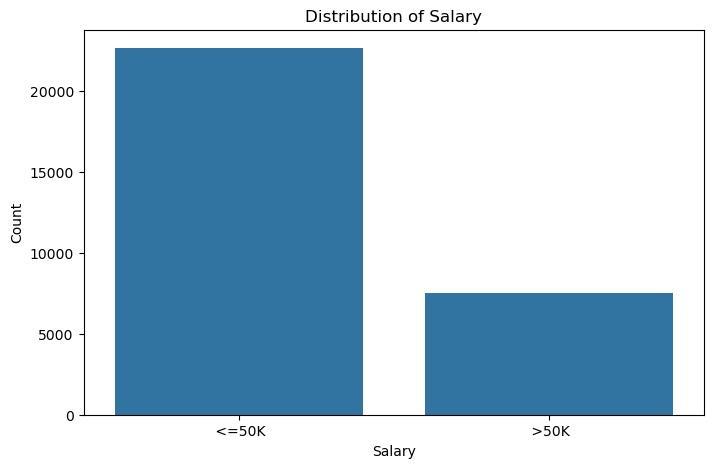

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
# Univariate Analysis
# Plotting the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='Salary', data=train_data)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

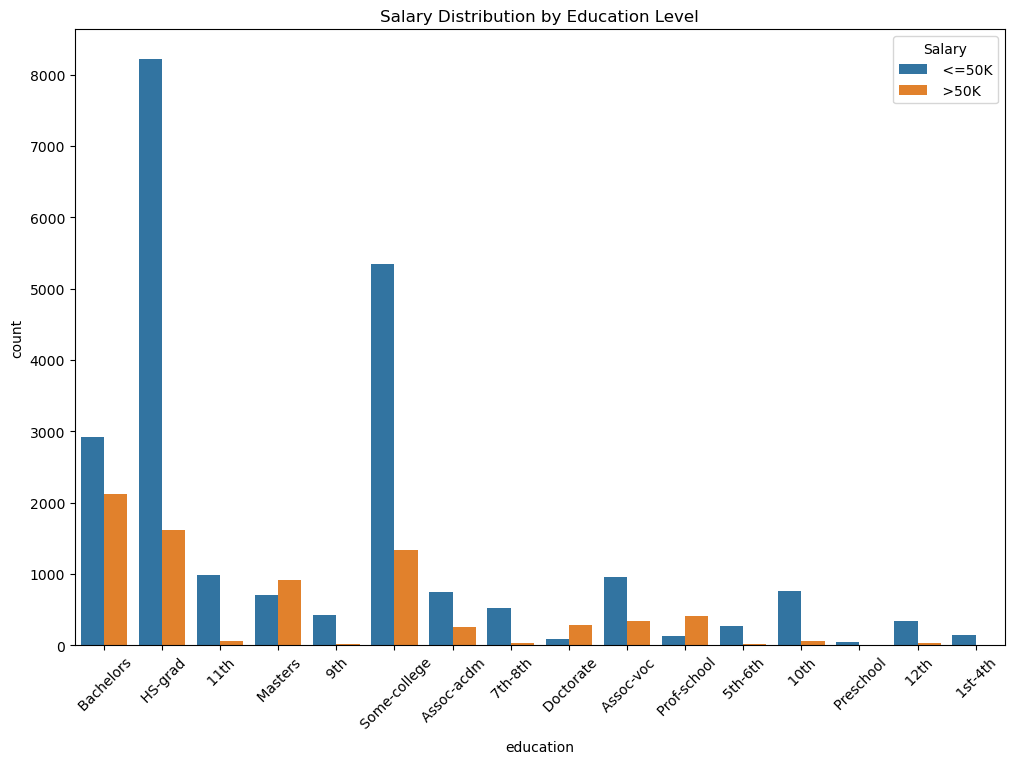

In [33]:
# Bivariate Analysis
# Analyzing the relationship between categorical features and the target variable
plt.figure(figsize=(12, 8))
sns.countplot(x='education', hue='Salary', data=train_data)
plt.title('Salary Distribution by Education Level')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Encode categorical variables
label_encoders = {}
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])  # Use the same encoder for test data
    label_encoders[column] = le

In [13]:
# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

In [15]:
# Train the model
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [17]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

In [19]:
# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[10759   601]
 [ 2491  1209]]


In [21]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87     11360
        >50K       0.67      0.33      0.44      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.79      0.77     15060

